In [86]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

GRT_QUERY_ENDPOINT_AVAX = "https://api.thegraph.com/subgraphs/name/convex-community/volume-avalanche-test"

def grt_query(query, endpoint):
    r = requests.post(endpoint, json={'query': query})
    return r.json()['data']

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [87]:
fee_query = """
{ pools(first: 1000) {
  isV2
  id
  name
  dailyPoolSnapshots(first: 1000 orderBy: timestamp orderDirection: desc) {
    timestamp
    tvl
  }
}
}
"""

In [3]:
data = grt_query(fee_query, GRT_QUERY_ENDPOINT_AVAX)['pools']
df = pd.DataFrame([{k: v for k, v in dict({key: val for key, val in entry.items() if key in ['id', 'isV2', 'name']}, **snapshot).items()} for entry in data for snapshot in entry['dailyPoolSnapshots']])
df['tvl'] = df['tvl'].astype(float)
df['timestamp'] = pd.to_datetime(df['timestamp'],unit='s')
df = df.sort_values('timestamp', ascending=True)
df

,isV2,id,name,timestamp,tvl
10726,True,0xb755b949c126c04e0348dd881a5cf55d424742b2,Curve USD-BTC-ETH,2021-10-05,3213274.85
7349,False,0x7f90122bf0700f9e7e1f688fe926940e8839f353,Curve.fi avDAI/avUSDC/avUSDT,2021-10-05,105846509.08
1355,False,0x16a7da911a4dd1d83f3ff066fe28f3c792c50d90,Curve.fi avWBTC/renBTC,2021-10-05,2270400.55
10725,True,0xb755b949c126c04e0348dd881a5cf55d424742b2,Curve USD-BTC-ETH,2021-10-06,5919474.67
1354,False,0x16a7da911a4dd1d83f3ff066fe28f3c792c50d90,Curve.fi avWBTC/renBTC,2021-10-06,3623047.63
...,...,...,...,...,...
15206,False,0xfc78eaff2e8290d3d608b689e93ec6954e21b6c2,Curve.fi Factory Plain Pool: renGOLD,2022-07-26,0.00
6495,False,0x75183ba0a9d7f0b006fbd2f130ed7ddbcb3c5907,Curve.fi Factory USD Metapool: TSDT/AVAX,2022-07-26,0.00
5589,False,0x6041631c566eb8dc6258a75fa5370761d4873990,Curve.fi Factory USD Metapool: TestH2O,2022-07-26,23.71
5354,False,0x5f16c819c22009746b79d3170d8c214c7c950b4e,Curve.fi Factory USD Metapool: TSD,2022-07-26,0.00


In [22]:
tvls = df[['name', 'timestamp', 'tvl']].pivot_table('tvl', ['timestamp'], 'name', aggfunc='sum').fillna(0)
tvls

name,Curve USD-BTC-ETH,Curve.fi Factory Plain Pool: 3pool,Curve.fi Factory Plain Pool: 3poolV2,Curve.fi Factory Plain Pool: 4pool,Curve.fi Factory Plain Pool: AVAX/USDC,Curve.fi Factory Plain Pool: Ankr Reward Earning Staked AVAX,Curve.fi Factory Plain Pool: Axelar DAI,Curve.fi Factory Plain Pool: Axelar/Wormhole UST,Curve.fi Factory Plain Pool: BTC/UST(Terra),Curve.fi Factory Plain Pool: Blizz,...,Curve.fi Factory USD Metapool: Topshelf USDL,Curve.fi Factory USD Metapool: USDC/av3CRV,Curve.fi Factory USD Metapool: USDR,Curve.fi Factory USD Metapool: USDS,Curve.fi Factory USD Metapool: Versus Token,Curve.fi Factory USD Metapool: deBridge-USDC,Curve.fi Factory USD Metapool: usdc.e/usd,Curve.fi aAvaDAI/aAvaUSDC/aAvaUSDT,Curve.fi avDAI/avUSDC/avUSDT,Curve.fi avWBTC/renBTC
timestamp,,,,,,,,,,,,,,,,,,,,,
2021-10-05,3213274.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,105846509.08,2270400.55
2021-10-06,5919474.67,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,222251001.00,3623047.63
2021-10-07,17322797.51,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,271141595.31,11247155.73
2021-10-08,13141968.36,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,287435794.54,9110361.70
2021-10-09,23153768.58,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,415003646.41,15000595.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-22,2763409.38,5608241.49,261226.25,47.30,0.00,143750.47,1100.00,0.00,0.00,50.90,...,87440.46,0.00,101084.93,64804.21,57.43,992919.73,0.00,300.32,59948189.96,3651263.55
2022-07-23,2761829.67,5928528.39,271342.53,48.95,0.00,140714.05,1100.00,0.00,0.00,50.90,...,87438.06,0.00,101084.93,64806.42,57.43,992833.86,0.00,300.34,59951900.35,3671184.57
2022-07-24,2786353.04,5697495.75,275496.13,47.47,0.00,135638.37,1100.00,0.00,0.00,50.90,...,87028.69,0.00,101084.93,64799.19,57.43,992861.46,0.00,300.36,60028046.49,3601845.88


In [39]:
tvls.columns[(tvls.max() > 5e6)]

Index(['Curve USD-BTC-ETH', 'Curve.fi Factory Plain Pool: 3pool',
       'Curve.fi Factory Plain Pool: 3poolV2',
       'Curve.fi Factory Plain Pool: 4pool',
       'Curve.fi Factory Plain Pool: USD Coin',
       'Curve.fi Factory Plain Pool: YUSD Pool',
       'Curve.fi Factory USD Metapool: Defrost H2O',
       'Curve.fi Factory USD Metapool: FRAX',
       'Curve.fi Factory USD Metapool: MAI',
       'Curve.fi Factory USD Metapool: MoreMoney USD',
       'Curve.fi Factory USD Metapool: NXUSD+av3CRV',
       'Curve.fi avDAI/avUSDC/avUSDT', 'Curve.fi avWBTC/renBTC'],
      dtype='object', name='name')

<AxesSubplot:xlabel='timestamp'>

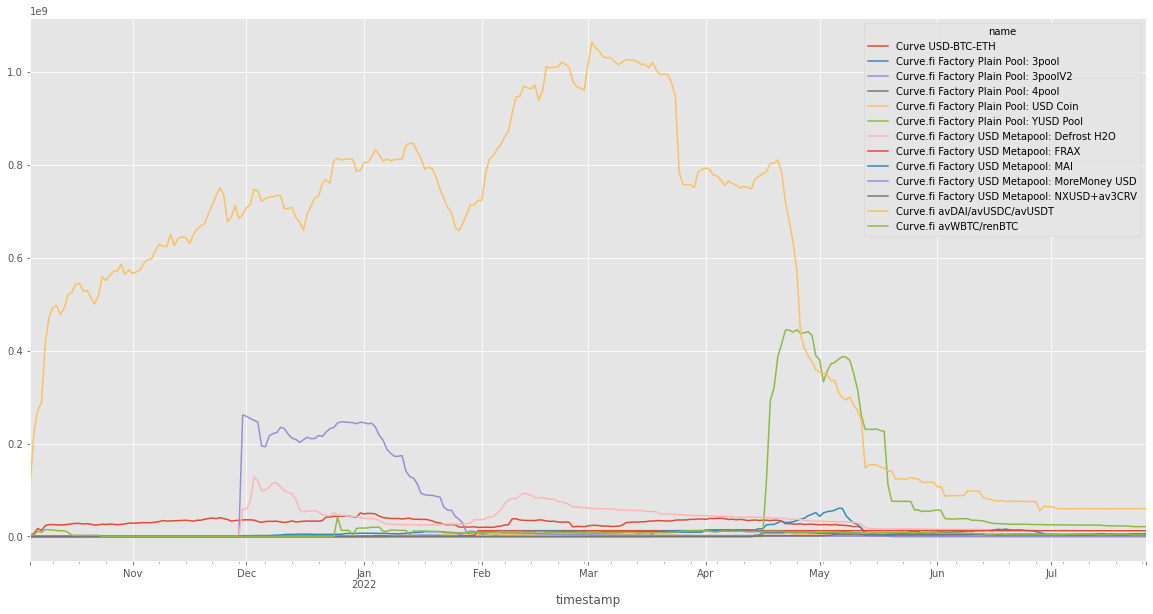

In [37]:
tvls[tvls.columns[(tvls.max() > 5e6)]].plot(figsize=(20, 10))

In [48]:
import matplotlib.patches as patches

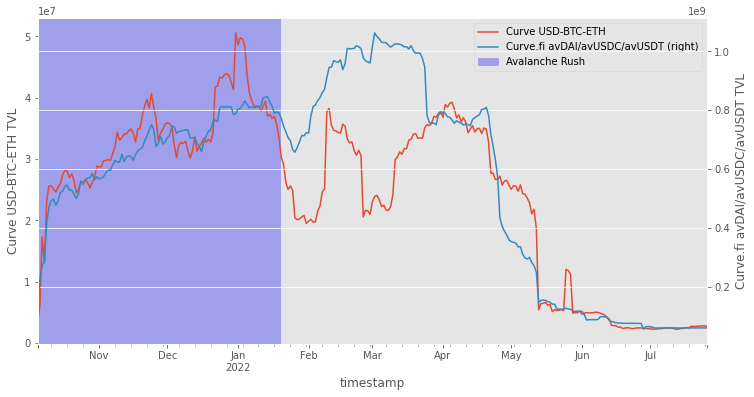

In [85]:
ax = tvls[['Curve USD-BTC-ETH', 'Curve.fi avDAI/avUSDC/avUSDT']].plot(figsize=(12,6), secondary_y=['Curve.fi avDAI/avUSDC/avUSDT'])
ax.right_ax.set_ylabel('Curve.fi avDAI/avUSDC/avUSDT TVL')
ax.set_ylabel('Curve USD-BTC-ETH TVL')

handles, labels = ax.get_legend_handles_labels()
ax.axvspan('2021-10-05', '2022-01-20', facecolor='blue', alpha=0.3)
red_patch = patches.Patch(color='blue', label='Avalanche Rush', alpha=0.3)
handles.append(ax.right_ax.get_legend_handles_labels()[0][0])
handles.append(red_patch)
ax.legend(handles=handles)